## 17_22_motorcycle.csv

In [2]:
import pandas as pd

In [2]:
# Try loading the CSV file with 'euc-kr' encoding
df = pd.read_csv('dataset/17_22_motorcycle.csv', encoding='euc-kr')

# Display the first few rows of the DataFrame
df.head()


,사고다발지fid,사고다발지id,법정동코드,지점코드,시도시군구명,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,104688,2020058,1111017500,11110001,서울특별시 종로구1,서울특별시 종로구 숭인동(동묘앞역 부근),43,53,0,19,27,7,127.015644,37.573022,"{""type"":""Polygon"",""coordinates"":[[[127.0167759..."
1,104683,2020058,1111017400,11110002,서울특별시 종로구2,서울특별시 종로구 창신동(오간수교남단 부근),28,33,0,6,16,11,127.009633,37.569467,"{""type"":""Polygon"",""coordinates"":[[[127.0107653..."
2,104684,2020058,1111016400,11110003,서울특별시 종로구3,서울특별시 종로구 종로6가(동대문로터리 부근),25,28,0,6,13,9,127.008737,37.571310,"{""type"":""Polygon"",""coordinates"":[[[127.0098693..."
3,104573,2020058,1111016500,11110004,서울특별시 종로구4,서울특별시 종로구 이화동(이화사거리 부근),24,24,0,9,12,3,127.002189,37.576176,"{""type"":""Polygon"",""coordinates"":[[[127.0033209..."
4,104773,2020058,1111016100,11110005,서울특별시 종로구5,서울특별시 종로구 종로4가(종로4가일반국도6호선 부근),21,31,0,12,16,3,126.997298,37.570828,"{""type"":""Polygon"",""coordinates"":[[[126.9984304..."


In [3]:
# Display basic statistics of the DataFrame
df.describe()


,사고다발지fid,사고다발지id,법정동코드,지점코드,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
count,1.648000e+03,1.648000e+03,1.648000e+03,1.648000e+03,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000
mean,4.525384e+06,2.021652e+06,2.624667e+09,2.624656e+07,10.382282,12.582524,0.189927,6.340413,5.098908,0.953277,127.585857,36.706574
std,3.168380e+06,1.208741e+03,1.362679e+09,1.362679e+07,6.693442,8.482089,0.465933,2.470718,6.774308,1.724744,0.904184,1.061116
min,1.042210e+05,2.020058e+06,1.111011e+09,1.111000e+07,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,126.253933,33.221737
25%,1.046328e+05,2.020058e+06,1.153011e+09,1.153001e+07,5.000000,7.000000,0.000000,4.000000,0.000000,0.000000,126.936225,35.816928
50%,6.779120e+06,2.022040e+06,2.638010e+09,2.638001e+07,7.000000,8.000000,0.000000,6.000000,1.000000,0.000000,127.070068,37.440857
75%,6.814181e+06,2.023017e+06,4.119011e+09,4.119001e+07,15.000000,18.000000,0.000000,8.000000,10.000000,1.000000,128.560953,37.546943
max,6.814655e+06,2.023017e+06,5.013025e+09,5.013000e+07,44.000000,79.000000,5.000000,26.000000,57.000000,15.000000,129.433121,38.075623


### 지역별 사고 발생 빈도

In [4]:
# Group by '시도시군구명' and sum the accident counts
accident_by_region = df.groupby('시도시군구명')['사고건수'].sum().sort_values(ascending=False)

accident_by_region


시도시군구명
부산광역시 부산진구1    65
부산광역시 부산진구2    61
서울특별시 관악구1     61
서울특별시 종로구1     58
경기도 부천시1       57
               ..
경상남도 거창군1       4
전라북도 익산시2       4
경상남도 김해시10      4
경상남도 김해시11      4
부산광역시 사하구9      4
Name: 사고건수, Length: 886, dtype: int64

In [5]:
death_by_region = df.groupby('시도시군구명')['사망자수'].sum().sort_values(ascending=False)
severe_injury_by_region = df.groupby('시도시군구명')['중상자수'].sum().sort_values(ascending=False)
minor_injury_by_region = df.groupby('시도시군구명')['경상자수'].sum().sort_values(ascending=False)

top_regions = {
    "Top Regions by Death": death_by_region.head(),
    "Top Regions by Severe Injury": severe_injury_by_region.head(),
    "Top Regions by Minor Injury": minor_injury_by_region.head()
}

top_regions

{'Top Regions by Death': 시도시군구명
 전라남도 여수시2      5
 경기도 부천시5       3
 서울특별시 동대문구4    3
 대구광역시 중구2      3
 경기도 군포시1       3
 Name: 사망자수, dtype: int64,
 'Top Regions by Severe Injury': 시도시군구명
 부산광역시 부산진구1    50
 부산광역시 부산진구2    47
 서울특별시 강북구1     39
 서울특별시 금천구1     38
 부산광역시 부산진구4    36
 Name: 중상자수, dtype: int64,
 'Top Regions by Minor Injury': 시도시군구명
 서울특별시 강북구1     67
 서울특별시 강북구2     44
 서울특별시 강서구1     38
 서울특별시 동대문구4    37
 서울특별시 관악구1     34
 Name: 경상자수, dtype: int64}

### 도로위험도지수

***

$$ 도로위험도지수 = 10 * 도로위험도_{basic} * X_{weather} * X_{traffic} * X_{time} $$

10 : 산출되는 도로위험도 지수 값이 적어 계산 값에 10을 곱하여 지수 산정

도로위험도 basic : 링크 단위길이 (km) 당 사고 심각도 유형

$ X_{weather} $ : 기상 수정계수 (맑음, 강우, 강설, 안개)

$ X_{traffic} $ : 트래픽 수정계수 (원활, 지체, 정체)

$ X_{time} $ : 주야시간대 수정계수 (주간, 야간)

***


In [6]:
# Calculate the severity index based on the given weights
severity_index = 10*(death_by_region * 1.0000 + severe_injury_by_region * 0.1168 + minor_injury_by_region * 0.0068)

# Sort the regions by the severity index
top_severity_regions = severity_index.sort_values(ascending=False).head(10)

top_severity_regions


시도시군구명
서울특별시 종로구1       61.548
부산광역시 부산진구1      60.236
충청남도 천안시 서북구1    60.152
전라남도 여수시2        59.264
부산광역시 부산진구3      57.908
부산광역시 서구1        57.544
부산광역시 부산진구2      56.460
서울특별시 동대문구4      55.876
서울특별시 동대문구1      55.640
서울특별시 강서구4       54.040
dtype: float64

In [7]:
severity_index.sort_values(ascending=False).tail(10)

시도시군구명
경기도 안산시 상록구11    3.152
서울특별시 강서구10      3.152
서울특별시 성북구16      3.084
서울특별시 영등포구17     2.948
서울특별시 송파구13      2.880
대구광역시 동구3        2.732
대구광역시 달서구26      2.324
충청북도 청주시 흥덕구2    2.256
대구광역시 중구6        1.984
서울특별시 성동구11      1.780
dtype: float64

### 도로위험도지수 군집화

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

optimal_clusters = 5

# 1. 데이터 스케일링
data = severity_index.values.reshape(-1, 1)  # Reshaping for the scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 2. K-means 클러스터링
# Elbow method를 사용하여 최적의 클러스터 수를 찾아볼 수 있습니다. 
# 여기서는 예시로 3개의 클러스터를 사용하였습니다.
kmeans = KMeans(n_clusters=optimal_clusters)
clusters = kmeans.fit_predict(scaled_data)

# 결과를 severity_index와 함께 DataFrame으로 만들기
df_clusters = pd.DataFrame({
    'Region': severity_index.index,
    'Severity Index': severity_index.values,
    'Cluster': clusters
})

# 3. 결과 시각화
plt.figure(figsize=(10,6))
for cluster in df_clusters['Cluster'].unique():
    subset = df_clusters[df_clusters['Cluster'] == cluster]
    plt.scatter(subset['Region'], subset['Severity Index'], label=f"Cluster {cluster}")

plt.xticks(rotation=45)
plt.legend()
plt.show()


C:\Users\asaf0\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

/Users/PC/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/PC/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/PC/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/PC/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

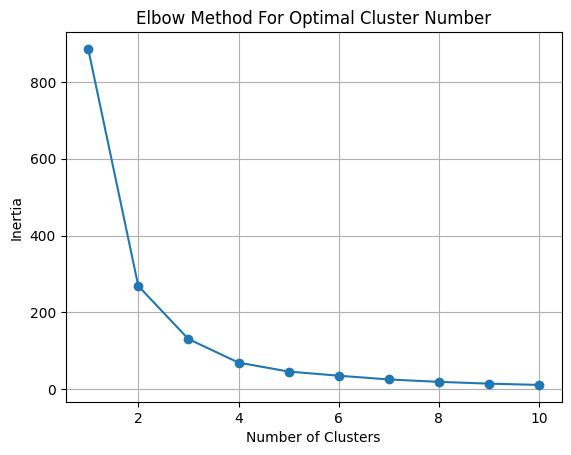

            Region  Severity Index  Cluster
0         강원도 양양군1           9.344        1
1         강원도 원주시1          18.992        0
2         강원도 원주시2           8.176        1
3         강원도 춘천시1          20.320        0
4         강원도 춘천시2          23.868        0
..             ...             ...      ...
881  충청북도 청주시 청원구3           4.672        1
882  충청북도 청주시 흥덕구1          11.600        1
883  충청북도 청주시 흥덕구2           2.256        1
884      충청북도 충주시1          37.712        2
885      충청북도 충주시2           7.064        1

[886 rows x 3 columns]


/Users/PC/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 데이터 스케일링
data = severity_index.values.reshape(-1, 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Elbow Method로 최적의 클러스터 수 찾기
inertia_list = []
cluster_range = range(1, 11)  # 1에서 10까지의 클러스터 수를 시도

for cluster_num in cluster_range:
    kmeans = KMeans(n_clusters=cluster_num, random_state=0).fit(scaled_data)
    inertia_list.append(kmeans.inertia_)

plt.figure()
plt.plot(cluster_range, inertia_list, marker='o')
plt.title('Elbow Method For Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Elbow point에서의 클러스터 수를 선택 (여기서는 그래프를 보고 직접 선택해야 함. 예를 들면 3을 선택했다고 가정)
optimal_clusters = optimal_clusters # 이 값을 그래프를 보고 적절하게 변경해야 합니다.

# 2. 최적의 클러스터 수로 K-means 클러스터링 진행
kmeans = KMeans(n_clusters=optimal_clusters)
clusters = kmeans.fit_predict(scaled_data)

# 결과를 severity_index와 함께 DataFrame으로 만들기
df_clusters = pd.DataFrame({
    'Region': severity_index.index,
    'Severity Index': severity_index.values,
    'Cluster': clusters
})

# 3. 군집화 결과를 DataFrame 형태로 출력
print(df_clusters)


In [ ]:
# 각 클러스터의 위험도 계수 평균 계산
cluster_severity_mean = df_clusters.groupby('Cluster')['Severity Index'].mean()

print(cluster_severity_mean)



In [15]:
import folium
# Create a base map again
map_center = [df['위도'].mean(), df['경도'].mean()]
m = folium.Map(location=map_center, zoom_start=7)

# Add markers to the map based on accident counts
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=row['사고건수'] * 0.5,  # Adjusting the size of the marker based on accident count
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(m)

m


## 최지훈_이륜차사고데이터.xls

***
이건 지훈이형이 해둔 분석으로 점점 이륜차 사고에 대한 이야기가 화두가 되고 있음을 보여주는 방식으로 가는 게 맞을 듯 보임.
***

In [14]:
import pandas as pd

# Load the data
file_path = 'dataset/최지훈_이륜차사고데이터.xls'
data = pd.read_excel(file_path)

# Extracting columns related to 이륜차 (two-wheeled vehicles)
two_wheeled_related_columns = [col for col in data.columns if '이륜차' in data[col][0]]

# Extracting two-wheeled vehicle data and transpose for better readability
two_wheeled_data = data[two_wheeled_related_columns].drop(index=0).transpose()

# Setting appropriate column names
two_wheeled_data.columns = [
    "Total Accidents",
    "Total Deaths",
    "Total Injuries",
    "Serious Injuries",
    "Minor Injuries",
    "Injury Reports",
    "Unknown"
]

# Extracting years from the index for plotting purposes
years = [col.split(".")[0] for col in two_wheeled_related_columns]

two_wheeled_data["Year"] = years
two_wheeled_data = two_wheeled_data.reset_index(drop=True)

# Convert data to numeric for analysis
for col in two_wheeled_data.columns[:-1]:
    two_wheeled_data[col] = pd.to_numeric(two_wheeled_data[col], errors='coerce')

# Display the processed data
print(two_wheeled_data)



   Total Accidents  Total Deaths  Total Injuries  Serious Injuries  \
0            22264           199           25001              9431   
1            23153           183           25982              9366   
2            24456           216           27214              9421   
3            22406           203           24978              8400   

   Minor Injuries  Injury Reports  Unknown  Year  
0           14212            1358      NaN  2019  
1           15237            1379      NaN  2020  
2           16612            1181      NaN  2021  
3           15373            1205      NaN  2022  


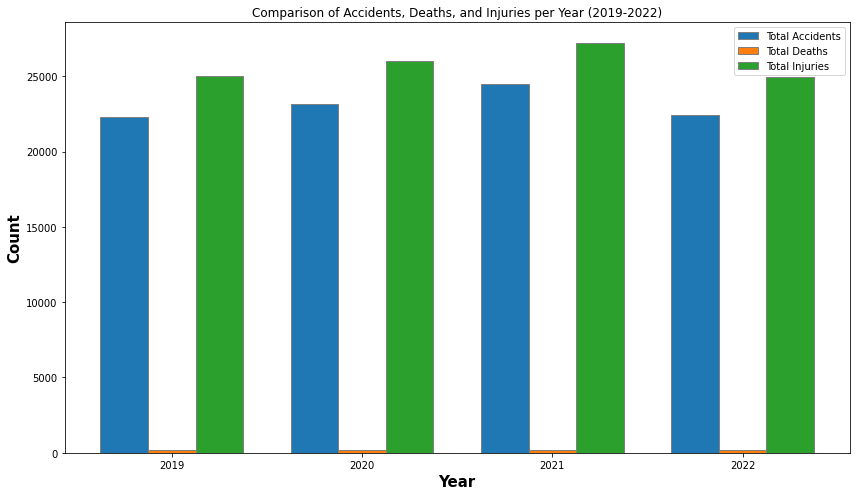

In [16]:
import matplotlib.pyplot as plt
# Plotting the bar chart for comparing accidents, deaths, and injuries per year
plt.figure(figsize=(12, 7))

bar_width = 0.25  # width of the bars
r1 = range(len(two_wheeled_data["Year"]))  # positions of bars on X-axis
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, two_wheeled_data["Total Accidents"], width=bar_width, edgecolor='grey', label='Total Accidents')
plt.bar(r2, two_wheeled_data["Total Deaths"], width=bar_width, edgecolor='grey', label='Total Deaths')
plt.bar(r3, two_wheeled_data["Total Injuries"], width=bar_width, edgecolor='grey', label='Total Injuries')

# Adding labels
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(two_wheeled_data["Year"]))], two_wheeled_data["Year"])

# Adding title and legend
plt.title('Comparison of Accidents, Deaths, and Injuries per Year (2019-2022)')
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


### 월별 위험도

In [17]:
# Extracting monthly accident data related to two-wheeled vehicles
monthly_accidents = data.iloc[1:2, 1:].transpose()
monthly_accidents.columns = ["Accidents"]
monthly_accidents["YearMonth"] = monthly_accidents.index

# Extracting year and month
monthly_accidents["Year"] = monthly_accidents["YearMonth"].apply(lambda x: x.split(".")[0])
monthly_accidents["Month"] = monthly_accidents["YearMonth"].apply(lambda x: x.split(".")[1] if "." in x else None)

# Filtering data for two-wheeled vehicles
two_wheeled_monthly_accidents = monthly_accidents[monthly_accidents["Year"].isin(["2019", "2020", "2021", "2022"]) & monthly_accidents["Month"].notna()]
two_wheeled_monthly_accidents["Accidents"] = pd.to_numeric(two_wheeled_monthly_accidents["Accidents"], errors='coerce')

# Creating a pivot table for visualization
pivot_accidents = two_wheeled_monthly_accidents.pivot(index='Month', columns='Year', values='Accidents')
pivot_accidents = pivot_accidents.reindex(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

pivot_accidents


C:\Users\asaf0\AppData\Local\Temp/ipykernel_20324/2398481672.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_wheeled_monthly_accidents["Accidents"] = pd.to_numeric(two_wheeled_monthly_accidents["Accidents"], errors='coerce')


Year,2019,2020,2021,2022
Month,,,,
1,113794,105920,101895,97025
2,8645,6821,6413,6491
3,14919,14216,13237,12010
4,771,731,772,713
5,22264,23153,24456,22406
6,198,139,139,153
7,2326,3023,2384,2292
8,8060,8087,7960,7877
9,433,637,1123,1323


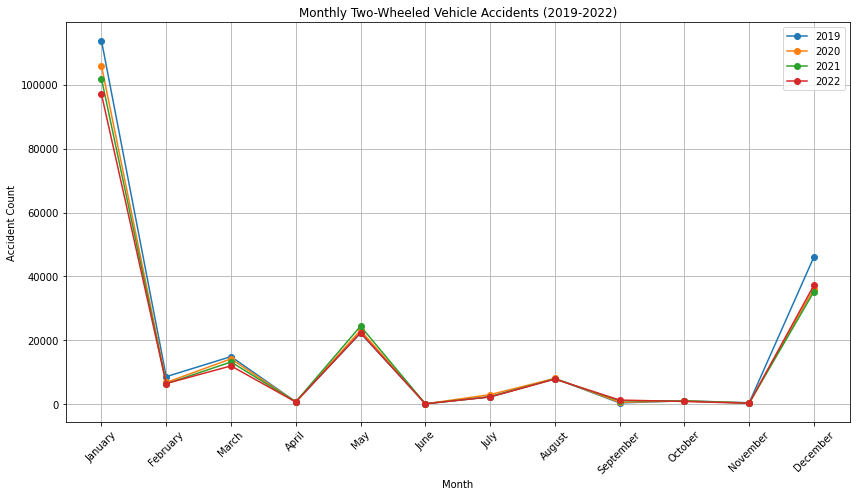

In [18]:
# Plotting the monthly accident trends over the years
plt.figure(figsize=(12, 7))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.plot(months, pivot_accidents['2019'], marker='o', label='2019')
plt.plot(months, pivot_accidents['2020'], marker='o', label='2020')
plt.plot(months, pivot_accidents['2021'], marker='o', label='2021')
plt.plot(months, pivot_accidents['2022'], marker='o', label='2022')

# Adding labels and title
plt.xlabel("Month")
plt.ylabel("Accident Count")
plt.title("Monthly Two-Wheeled Vehicle Accidents (2019-2022)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

In [19]:
# Converting the data to numeric for calculations
data["2019.2"] = pd.to_numeric(data["2019.2"], errors='coerce')
data["2019.3"] = pd.to_numeric(data["2019.3"], errors='coerce')

# Calculating mortality rate for each transportation type in 2019
data["Mortality Rate 2019"] = (data["2019.2"] / data["2019.3"]) * 100

# Extracting relevant columns for analysis
mortality_data_2019 = data[["사고년도", "Mortality Rate 2019"]].drop(index=0).reset_index(drop=True)
mortality_data_2019.columns = ["Transportation Type", "Mortality Rate 2019"]

# Sorting the data based on the mortality rate
mortality_data_2019 = mortality_data_2019.sort_values(by="Mortality Rate 2019", ascending=False)

# Displaying the top 5 transportation types with highest mortality rate in 2019
mortality_data_2019.head()


,Transportation Type,Mortality Rate 2019
5,(부상신고자[명]),109.101317
4,(경상자[명]),84.996266
2,부상[명],80.931550
0,사고[건],57.946243
3,(중상자[명]),56.179080


### 이륜차 연도별 사망률 

***
연도별은 그냥 해본거고, 전체적인 평균 사망률을 이렇게 되면 구할 수 있게 됨. 

$$ \text{Overall Mortality Rate} = (\frac{Total Deaths (2019-2022)}{Total Injuries (2019-2022)})$$

In [20]:
# Extracting two-wheeled vehicle data for mortality rate calculation
two_wheeled_mortality_data = two_wheeled_data.copy()

# Calculating mortality rate
two_wheeled_mortality_data["Mortality Rate"] = (two_wheeled_mortality_data["Total Deaths"] / two_wheeled_mortality_data["Total Injuries"]) * 100

# Displaying the mortality rate of two-wheeled vehicles from 2019 to 2022
two_wheeled_mortality_data[["Year", "Mortality Rate"]]


,Year,Mortality Rate
0,2019,0.795968
1,2020,0.704334
2,2021,0.793709
3,2022,0.812715


In [21]:
# Calculating overall mortality rate for two-wheeled vehicles from 2019 to 2022
total_deaths = two_wheeled_data["Total Deaths"].sum()
total_injuries = two_wheeled_data["Total Injuries"].sum()

# Calculating mortality rate
overall_mortality_rate = (total_deaths / total_injuries) * 100

overall_mortality_rate


0.7763508601889992

## 가해운전자_차량용도별_시간별_교통사고_중상자포함.xls

In [3]:
# Load the data with the second row as the header
data = pd.read_excel('dataset/가해운전자_차량용도별_시간별_교통사고_중상자포함.xls', sheet_name='Sheet1', skiprows=1)

# Display the first few rows of the dataset
data.head()


,가해운전자 차량용도 대분류,가해운전자 차량용도 중분류,사고년도,00시-02시,02시-04시,04시-06시,06시-08시,08시-10시,10시-12시,12시-14시,...,04시-06시.2,06시-08시.2,08시-10시.2,10시-12시.2,12시-14시.2,14시-16시.2,16시-18시.2,18시-20시.2,20시-22시.2,22시-24시.2
0,사업용,노선버스,사고[건],44,6,53,319,685.0,701,656,...,44,302,736,648,736,805,855,712,495,269
1,사업용,노선버스,사망[명],3,0,1,4,6.0,9,7,...,1,6,10,6,9,6,5,2,12,6
2,사업용,노선버스,부상[명],60,7,76,483,1021.0,965,1021,...,61,420,1039,878,970,1182,1143,991,704,403
3,사업용,노선버스,(중상자[명]),19,0,24,111,275.0,255,241,...,15,117,250,224,260,257,261,204,137,80
4,사업용,전세버스,사고[건],12,2,21,112,90.0,22,31,...,39,139,147,69,65,97,154,195,89,28


In [4]:
# Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Extracting relevant rows (사고 건수, 사망자 수, 중상자 수) for "이륜차"
motorcycle_data = data[data['가해운전자 차량용도 중분류'] == '이륜차']

# Grouping by time period and summing across years
time_periods = [col.split('.')[0] for col in motorcycle_data.columns[3:]]
grouped_accident_counts = []
grouped_death_counts = []
grouped_severe_injury_counts = []

for i, time_period in enumerate(set(time_periods)):
    # Boolean mask to select columns
    mask = [time_period in col for col in motorcycle_data.columns]
    
    # Summing across years for each time period
    grouped_accident_counts.append(motorcycle_data.loc[motorcycle_data['사고년도'] == '사고[건]', mask].sum(axis=1).values[0])
    grouped_death_counts.append(motorcycle_data.loc[motorcycle_data['사고년도'] == '사망[명]', mask].sum(axis=1).values[0])
    grouped_severe_injury_counts.append(motorcycle_data.loc[motorcycle_data['사고년도'] == '(중상자[명])', mask].sum(axis=1).values[0])

# Calculate risk and probability
total_accidents = sum(grouped_accident_counts)
accident_risk = [count / total_accidents for count in grouped_accident_counts]  # 사고 위험도

# Avoiding division by zero
grouped_accident_counts_nonzero = [count if count != 0 else 1 for count in grouped_accident_counts]

death_probability = [death / accident for death, accident in zip(grouped_death_counts, grouped_accident_counts_nonzero)]  # 사망 확률
severe_injury_probability = [injury / accident for injury, accident in zip(grouped_severe_injury_counts, grouped_accident_counts_nonzero)]  # 중상 확률

# Creating a DataFrame for clearer visualization
calculated_data_grouped = pd.DataFrame({
    'Time Period': list(set(time_periods)),
    'Accident Risk': accident_risk,
    'Death Probability': death_probability,
    'Severe Injury Probability': severe_injury_probability
})

calculated_data_grouped.sort_values(by='Time Period')

,Time Period,Accident Risk,Death Probability,Severe Injury Probability
11,00시-02시,0.040561,0.041256,0.351149
10,02시-04시,0.022553,0.074199,0.422428
8,04시-06시,0.019149,0.064548,0.432969
7,06시-08시,0.029209,0.039062,0.367839
0,08시-10시,0.048833,0.033489,0.328660
5,10시-12시,0.084755,0.025129,0.306709
1,12시-14시,0.121836,0.020134,0.288591
9,14시-16시,0.109723,0.024090,0.280243
4,16시-18시,0.127275,0.019124,0.284327
6,18시-20시,0.185369,0.014465,0.291650


### Question Mark

***
여기서 accident risk를 구하긴 했는데, 이것은 전체 사고 개수 중에서 그 시간에 몇 개 일어났는지 얘기하는 거임! 이게 Make sense?
일단, 중상 확률로 6시간 단위 4개 군집화가 합당한지 check
***



In [5]:
# Grouping by time period and summing across years
time_periods = [col.split('.')[0] for col in motorcycle_data.columns[3:]]
grouped_accident_counts = []
grouped_death_counts = []
grouped_severe_injury_counts = []

for i, time_period in enumerate(set(time_periods)):
    # Boolean mask to select columns
    mask = [time_period in col for col in motorcycle_data.columns]
    
    # Summing across years for each time period
    grouped_accident_counts.append(motorcycle_data.loc[motorcycle_data['사고년도'] == '사고[건]', mask].sum(axis=1).values[0])
    grouped_death_counts.append(motorcycle_data.loc[motorcycle_data['사고년도'] == '사망[명]', mask].sum(axis=1).values[0])
    grouped_severe_injury_counts.append(motorcycle_data.loc[motorcycle_data['사고년도'] == '(중상자[명])', mask].sum(axis=1).values[0])

# Calculate risk and probability
total_accidents = sum(grouped_accident_counts)
accident_risk = [count / total_accidents for count in grouped_accident_counts]  # 사고 위험도

# Avoiding division by zero
grouped_accident_counts_nonzero = [count if count != 0 else 1 for count in grouped_accident_counts]

death_probability = [death / accident for death, accident in zip(grouped_death_counts, grouped_accident_counts_nonzero)]  # 사망 확률
severe_injury_probability = [injury / accident for injury, accident in zip(grouped_severe_injury_counts, grouped_accident_counts_nonzero)]  # 중상 확률

# Creating a DataFrame for clearer visualization
calculated_data_grouped = pd.DataFrame({
    'Time Period': list(set(time_periods)),
    'Accident Risk': accident_risk,
    'Death Probability': death_probability,
    'Severe Injury Probability': severe_injury_probability
})

# Sorting data for better visualization
calculated_data_grouped = calculated_data_grouped.sort_values(by='Time Period')

# Calculating the average of 'Severe Injury Probability'
average_severe_injury_prob = calculated_data_grouped['Severe Injury Probability'].mean()

# Creating a new column for the ratio of 'Severe Injury Probability' to its average
calculated_data_grouped['Severe Injury Probability Ratio'] = calculated_data_grouped['Severe Injury Probability'] / average_severe_injury_prob

# Displaying the dataframe with the new ratio column
calculated_data_grouped[['Time Period', 'Severe Injury Probability', 'Severe Injury Probability Ratio']]

,Time Period,Severe Injury Probability,Severe Injury Probability Ratio
11,00시-02시,0.351149,1.053291
10,02시-04시,0.422428,1.267099
8,04시-06시,0.432969,1.298717
7,06시-08시,0.367839,1.103354
0,08시-10시,0.328660,0.985837
5,10시-12시,0.306709,0.919991
1,12시-14시,0.288591,0.865645
9,14시-16시,0.280243,0.840605
4,16시-18시,0.284327,0.852856
6,18시-20시,0.291650,0.874820


***
6시간 단위로 4개로 쪼개는데, 가장 차이를 많이 두기 위해서 iteration 돌려서 가장 표준편차가 크게 나오는 조합으로 선정하였음.
***

In [6]:
# Step 3: Data Grouping and Calculations

# Extract time periods from column names
time_periods = [col.split('.')[0] for col in motorcycle_data.columns[3:]]

# Initialize lists to store calculated values
grouped_accident_counts = []
grouped_death_counts = []
grouped_severe_injury_counts = []

# Group by time period and sum across years
unique_time_periods = sorted(set(time_periods))
for i, time_period in enumerate(unique_time_periods):
    mask = [time_period in col for col in motorcycle_data.columns]
    grouped_accident_counts.append(motorcycle_data.loc[motorcycle_data['사고년도'] == '사고[건]', mask].sum(axis=1).values[0])
    grouped_death_counts.append(motorcycle_data.loc[motorcycle_data['사고년도'] == '사망[명]', mask].sum(axis=1).values[0])
    grouped_severe_injury_counts.append(motorcycle_data.loc[motorcycle_data['사고년도'] == '(중상자[명])', mask].sum(axis=1).values[0])

# Calculate risk and probability
total_accidents = sum(grouped_accident_counts)
accident_risk = [count / total_accidents for count in grouped_accident_counts]  

# Avoiding division by zero
grouped_accident_counts_nonzero = [count if count != 0 else 1 for count in grouped_accident_counts]

death_probability = [death / accident for death, accident in zip(grouped_death_counts, grouped_accident_counts_nonzero)]  
severe_injury_probability = [injury / accident for injury, accident in zip(grouped_severe_injury_counts, grouped_accident_counts_nonzero)]  

# Calculate severity and normalize so that the average severity is 1
severity = [0.0068 *(1- death_probability[i]- severe_injury_probability[i])+
    1 * death_probability[i] + 
    0.1168 * severe_injury_probability[i] 
    for i in range(len(unique_time_periods))
]

# Normalizing severity
average_severity = sum(severity) / len(severity)
normalized_severity = [s / average_severity for s in severity]

# Creating a DataFrame for clearer visualization
calculated_data_grouped = pd.DataFrame({
    'Time Period': unique_time_periods,
    'Accident Risk': accident_risk,
    'Death Probability': death_probability,
    'Severe Injury Probability': severe_injury_probability,
    'Severity': severity,
    'Normalized Severity': normalized_severity
})

# Display the calculated data
calculated_data_grouped


,Time Period,Accident Risk,Death Probability,Severe Injury Probability,Severity,Normalized Severity
0,00시-02시,0.040561,0.041256,0.351149,0.086402,1.135230
1,02시-04시,0.022553,0.074199,0.422428,0.126962,1.668134
2,04시-06시,0.019149,0.064548,0.432969,0.118536,1.557430
3,06시-08시,0.029209,0.039062,0.367839,0.086059,1.130721
4,08시-10시,0.048833,0.033489,0.328660,0.076214,1.001368
5,10시-12시,0.084755,0.025129,0.306709,0.065496,0.860546
6,12시-14시,0.121836,0.020134,0.288591,0.058542,0.769181
7,14시-16시,0.109723,0.024090,0.280243,0.061553,0.808738
8,16시-18시,0.127275,0.019124,0.284327,0.057070,0.749841
9,18시-20시,0.185369,0.014465,0.291650,0.053248,0.699614


In [7]:
import itertools
import numpy as np

# Define a function to calculate the average Normalized Severity for a 6-hour period
def calculate_avg_normalized_severity(period_indices, data_df):
    return data_df['Normalized Severity'].iloc[list(period_indices)].mean()

# Define a function to calculate the standard deviation for a set of 4 non-overlapping 6-hour periods
def calculate_std_for_periods(period_indices, data_df):
    selected_metrics = pd.DataFrame([calculate_avg_normalized_severity(indices, data_df) for indices in period_indices])
    return selected_metrics.std().values[0]

# Check all combinations of 4 non-overlapping 6-hour periods
max_std_dev = 0  
optimal_combination = None

# All possible combinations of 3 consecutive time periods (6 hours), considering the continuity from 22-24 to 00-02
all_combinations = [(i, (i + 1) % 12, (i + 2) % 12) for i in range(12)]

# Trying to identify the optimal combination
for combo in itertools.combinations(all_combinations, 4):
    # Ensure periods are non-overlapping and cover entire 24 hours
    flat_combo = [idx for subcombo in combo for idx in subcombo]
    if len(set(flat_combo)) == 12:  # Ensuring all periods are covered without overlaps
        total_std_dev = calculate_std_for_periods(combo, calculated_data_grouped)
        if total_std_dev > max_std_dev:
            max_std_dev = total_std_dev
            optimal_combination = combo

# Displaying the optimal combination of 6-hour periods
optimal_6h_periods_df = pd.DataFrame([calculate_avg_normalized_severity(period, calculated_data_grouped) for period in optimal_combination])
optimal_6h_periods_df['Time Periods'] = [' + '.join([calculated_data_grouped['Time Period'].iloc[i] for i in period]) for period in optimal_combination]
optimal_6h_periods_df.columns = ['Avg Normalized Severity', 'Time Periods']
optimal_6h_periods_df[['Time Periods', 'Avg Normalized Severity']]


,Time Periods,Avg Normalized Severity
0,00시-02시 + 02시-04시 + 04시-06시,1.453598
1,06시-08시 + 08시-10시 + 10시-12시,0.997545
2,12시-14시 + 14시-16시 + 16시-18시,0.775920
3,18시-20시 + 20시-22시 + 22시-24시,0.772937


In [8]:
a = 1.480819 / 0.762032
b = 0.994754 / 0.762032
c = 1
d = 0.762395 / 0.762032

a,b,c,d

(1.9432504146807483, 1.3053966237638315, 1, 1.0004763579482225)

***
00-06시 시간별 가중치 1.94325

06-12시 시간별 가중치 1.30540

12-18시 시간별 가중치 1

18-24시 시간별 가중치 1.00048

***


## 기상상태별_교통사고.xlsx

In [6]:
import pandas as pd

# Load the data
file_path = 'dataset/기상상태.xlsx'
weather_data = pd.read_excel(file_path)

# Display basic information and first few rows of the data
(weather_data.info(), weather_data.head())


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/기상상태.xlsx'

## 가해운전자_차종별_도로형태별_교통사고.xls

In [5]:
# Loading the new data and displaying basic information and the first few rows
road_data_path = 'dataset/가해운전자_차종별_도로형태별_교통사고.xls'
road_data = pd.read_excel(road_data_path)

road_data_info = road_data.info()
road_data_head = road_data.head()

road_data_info, road_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   가해운전자 차종별   41 non-null     object
 1   사고년도        41 non-null     object
 2   2020        41 non-null     object
 3   2020.1      41 non-null     object
 4   2020.2      41 non-null     object
 5   2020.3      41 non-null     object
 6   2020.4      41 non-null     object
 7   2020.5      41 non-null     object
 8   2020.6      41 non-null     object
 9   2020.7      41 non-null     object
 10  2020.8      41 non-null     object
 11  2020.9      41 non-null     object
 12  2020.10     41 non-null     object
 13  2020.11     41 non-null     object
 14  2020.12     41 non-null     object
 15  2020.13     41 non-null     object
 16  2020.14     41 non-null     object
 17  2020.15     41 non-null     object
 18  2020.16     41 non-null     object
 19  2020.17     41 non-null     object
 20  2020.18     

(None,
    가해운전자 차종별    사고년도    2020 2020.1 2020.2 2020.3     2020.4  2020.5  2020.6  \
 0  가해운전자 차종별    사고년도      합계     합계     합계     합계         합계      합계      합계   
 1  가해운전자 차종별    사고년도      합계    터널안    교량위  고가도로위  지하차도(도로)내   기타단일로    교차로내   
 2          합계  사고[건]  209654    771   1444    572       2333   89157   65978   
 3          합계  사망[명]    3081     40     53     14         78    1711     630   
 4          합계  부상[명]  306194   1651   2390    936       3530  127672  100597   
 
      2020.7  ...    2022.15 2022.16 2022.17 2022.18   2022.19 2022.20 2022.21  \
 0        합계  ...        단일로     단일로     교차로     교차로       교차로     교차로   철길건널목   
 1  교차로횡단보도내  ...  지하차도(도로)내   기타단일로      합계    교차로내  교차로횡단보도내   교차로부근      합계   
 2      6746  ...       3027   80846   95354   56255      7425   31674       4   
 3       137  ...         82    1491     936     535       141     260       3   
 4      7461  ...       4340  114861  137613   83103      7996   46514       5   
 
   2022.22 

In [7]:
# Extracting relevant data
accidents = weather_data.loc[weather_data['분류'] == '사고', weather_data.columns[1:]].values.flatten()
deaths = weather_data.loc[weather_data['분류'] == '사망', weather_data.columns[1:]].values.flatten()
injuries = weather_data.loc[weather_data['분류'] == '부상', weather_data.columns[1:]].values.flatten()

# Calculating probabilities and risks
accident_risk = accidents / accidents.sum()
death_probability = deaths / accidents
severe_injury_probability = injuries / accidents

# Calculating severity for each weather condition using provided formula
severity = [
      
    1 * death_probability[i] + 
    0.1168 * severe_injury_probability[i] 
    for i in range(len(accident_risk))
]

# Normalizing the severity so that the average severity is 1
severity = severity / sum(severity) * len(severity)

# Creating a DataFrame to display the results
severity_df = pd.DataFrame({
    'Weather Condition': weather_data.columns[1:],
    'Severity': severity
})

severity_df


NameError: name 'weather_data' is not defined

***
이것은 기상상태 별 부상자, 경상자, 사망자 수 비율을 해서 앞에 주어진 계수들 곱해서 만든 severity를 한건데.. 우리가 생각했던거랑 좀 다름. 이 계수를 만지는게 좀 중요해보임
***

In [43]:
import pandas as pd

# Load the data from the Excel file
file_path = 'dataset/도로유형.xlsx'
road_data = pd.read_excel(file_path)

# Display basic information and first few rows of the data
road_data.info(), road_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   분류         3 non-null      object
 1   터널안        3 non-null      int64 
 2   교량위        3 non-null      int64 
 3   고가도로위      3 non-null      int64 
 4   지하차도(도로)내  3 non-null      int64 
 5   기타단일로      3 non-null      int64 
 6   교차로내       3 non-null      int64 
 7   교차로횡단보도내   3 non-null      int64 
 8   교차로부근      3 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 344.0+ bytes


(None,
    분류  터널안   교량위  고가도로위  지하차도(도로)내  기타단일로   교차로내  교차로횡단보도내  교차로부근
 0  사고   122  260    120        645  20212  18548      2155   7951
 1  사망    14   18     11         42    657    303        22    117
 2  부상   142  338    150        767  24716  25672      2557  10613)

In [44]:
# Extracting relevant data
accidents = road_data[road_data['분류'] == '사고'].iloc[:, 1:].values.flatten()
deaths = road_data[road_data['분류'] == '사망'].iloc[:, 1:].values.flatten()
injuries = road_data[road_data['분류'] == '부상'].iloc[:, 1:].values.flatten()

# Calculating probabilities
death_probabilities = deaths / accidents
injury_probabilities = injuries / accidents

# Defining the coefficients from the formula
death_coefficient = 1
injury_coefficient = 0.0068 + 0.1168

# Calculating the risk
risk = death_probabilities * death_coefficient + injury_probabilities * injury_coefficient

# Creating a DataFrame to display results in a readable format
road_types = road_data.columns[1:]
risk_df = pd.DataFrame({
    '도로 유형': road_types,
    '위험도': risk
})

risk_df


,도로 유형,위험도
0,터널안,0.258616
1,교량위,0.229911
2,고가도로위,0.246167
3,지하차도(도로)내,0.212095
4,기타단일로,0.183648
5,교차로내,0.187409
6,교차로횡단보도내,0.156866
7,교차로부근,0.179696


In [45]:
# Finding the minimum risk value
min_risk = risk_df['위험도'].min()

# Normalizing the risks according to the minimum risk
risk_df['정규화된 위험도'] = risk_df['위험도'] / min_risk

risk_df[['도로 유형', '정규화된 위험도']]


,도로 유형,정규화된 위험도
0,터널안,1.648650
1,교량위,1.465655
2,고가도로위,1.569285
3,지하차도(도로)내,1.352081
4,기타단일로,1.170737
5,교차로내,1.194710
6,교차로횡단보도내,1.000000
7,교차로부근,1.145545
